### Падение тела

-Graphics-
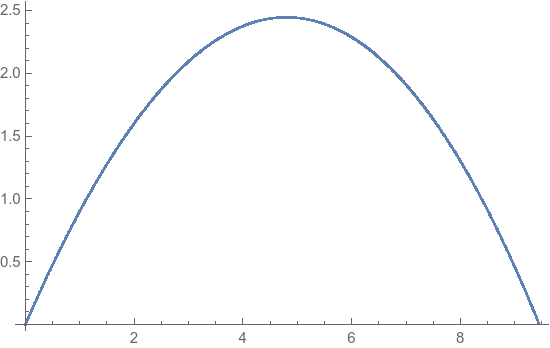

In [1]:
tmax := 1.41
alpha := Pi / 4
v0 := 10
k := 0.01
g := 9.81

sol = NDSolve[
    {
        y1'[t] == y2[t],
        y2'[t] == -k * y2[t] * Sqrt[y2[t] ^ 2 + y4[t] ^ 2],
        y3'[t] == y4[t],
        y4'[t] == -k * y4[t] * Sqrt[y2[t] ^ 2 + y4[t] ^ 2] - g,
        y1[0] == 0,
        y2[0] == v0 * Cos[alpha],
        y3[0] == 0,
        y4[0] == v0 * Sin[alpha]
    },
    {y1, y2, y3, y4},
    {t, 0, tmax},
    MaxSteps -> 10000
];

dataset = Table[
  {y1[t], y3[t]} /. sol[[1]],
  {t, 0, tmax, 0.001}
];

ListPlot[dataset]

### Модель "хищник-жертва"

In [9]:
tables = {};

a := 3
c := 1
d := 1

For[b = 2, b <= 4, b++,
     sol = NDSolve[
        {
            x'[t] == (a - b * y[t]) * x[t],
            y'[t] == (-c + d * x[t]) * y[t],
            x[0] == 2,
            y[0] == 1
        },
        {x, y},
        {t, 0, 7},
        MaxSteps -> 3000
    ];
    dataset = Table[
      {x[t], y[t]} /. sol[[1]],
      {t, 0, 7, 0.01}
    ];
    tables = Append[tables, ListPlot[dataset]];
];

-Graphics-
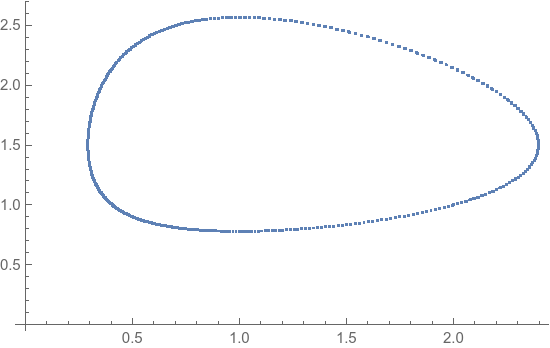

In [14]:
tables[[1]]

-Graphics-
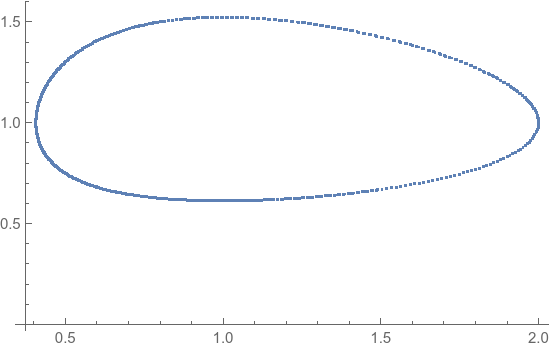

In [15]:
tables[[2]]

-Graphics-
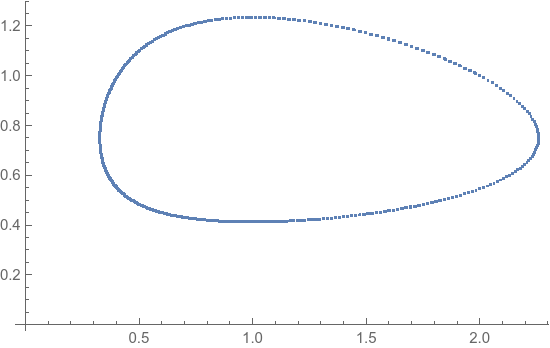

In [16]:
tables[[3]]

In [17]:
(* Manipulate[
    tables[[b - 1]],
    {
        b,
        2,
        4,
        1
    },
    LocalizeVariables -> False
] *)

(* Для Wolfram Cloud *)